In [1]:
#Importing the packages
import pandas as pd


Loading CSV File

In [ ]:
#reading the data
data = pd.read_csv("E:\\MR-ML-Assessments-main\\MR-ML-Assessments-main\\2. neural network\\datasets\\full dataset\\phone-reviews.csv")

In [3]:
data.head(5)

,rating,title,body
0,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,5,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,3,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...


# Removing Missing Values

In [4]:
data.isna().sum()

rating     0
title     14
body      21
dtype: int64

In [5]:
data=data[['rating','title']]
data.dropna(inplace=True)

In [6]:
data.isna().sum()

rating    0
title     0
dtype: int64

In [7]:
desc=data.describe()
print(desc)

             rating
count  67972.000000
mean       3.807686
std        1.582983
min        1.000000
25%        3.000000
50%        5.000000
75%        5.000000
max        5.000000


In [8]:
def lable_function(rating):
    if rating >=4:
        return 'Positive'
    elif rating <=2:
        return 'Negative'
    else:
        return 'Neutral'

data['label']=data['rating'].apply(lable_function)
    

# Preprocessing Data using nltk library

In [10]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stop_words=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

def clean_review(title):
    title= re.sub(r'http\S+','',title)
    title= re.sub('[^a-zA-Z]',' ',title)
    title= str(title).lower()
    title= word_tokenize(title)
    title= [item for item in title if item not in stop_words]
    title= [lemma.lemmatize(word=w,pos='v') for w in title]
    title= [i for i in title if len(i)>2]
    title= ' '.join(title)
    return title

data['cleanTitle']=data['title'].apply(clean_review)


In [11]:
PositiveReview=data[data.label=='Positive']['cleanTitle']
NeutralReview=data[data.label=='Neutral']['cleanTitle']
NegativeReview=data[data.label=='Negative']['cleanTitle']


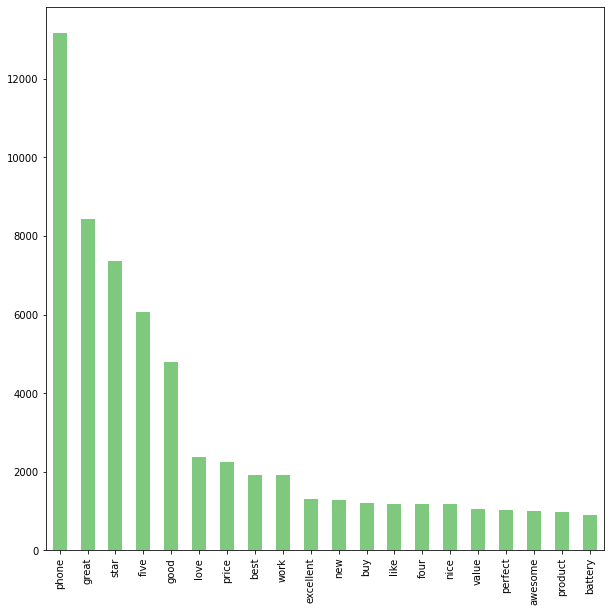

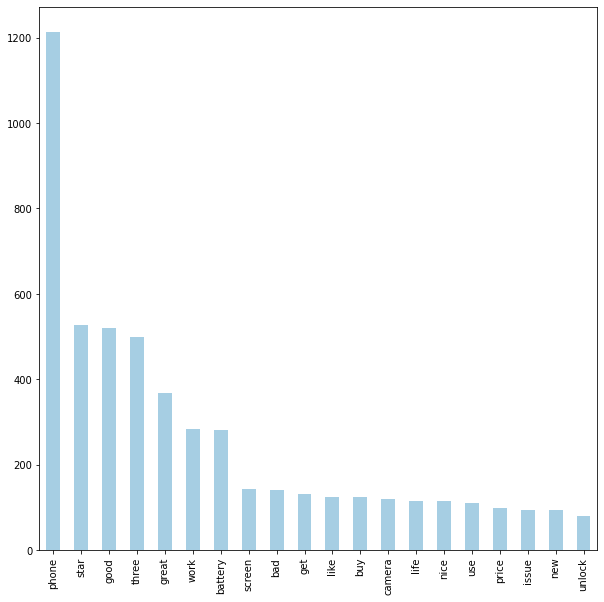

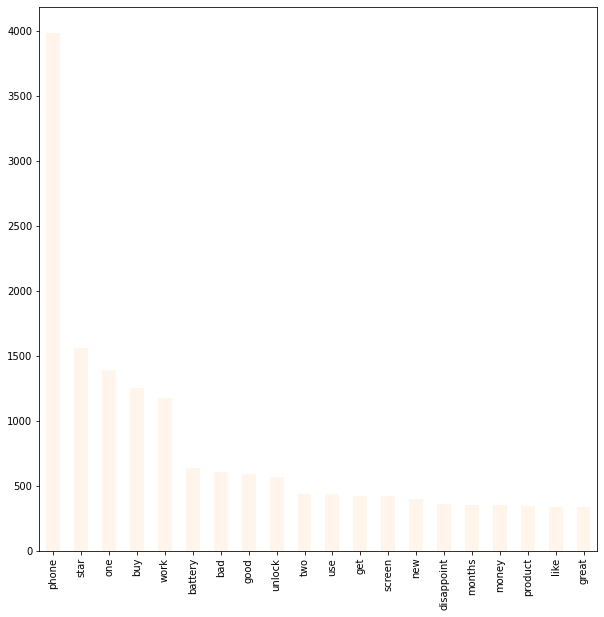

In [12]:
import matplotlib.pyplot as plt
color=['Accent','Paired','Oranges']
splitedData=[PositiveReview,NeutralReview,NegativeReview]
for i in range(3):
    plt.figure(figsize=(10,10))
    pd.Series(' '.join([i for i in splitedData[i]]).split()).value_counts().head(20).plot(kind='bar',colormap=color[i])
    plt.show()

In [13]:
len(data)

67972

In [14]:
data.head(5)

,rating,title,label,cleanTitle
0,3,"Def not best, but not worst",Neutral,def best worst
1,1,Text Messaging Doesn't Work,Negative,text message work
2,5,Love This Phone,Positive,love phone
3,3,"Love the Phone, BUT...!",Neutral,love phone
4,4,"Great phone service and options, lousy case!",Positive,great phone service options lousy case


# Gensim Word2vec module

In [15]:
from gensim.test.utils import datapath
from gensim import utils

d=data.title.apply(utils.simple_preprocess)

In [20]:
import time
from gensim import models
from gensim.models.word2vec import Word2Vec
start_time = time.time()
model=Word2Vec(window=10,min_count=1,workers=4)
print("Time taken to train word2vec model: " + str(time.time() - start_time))

Time taken to train word2vec model: 0.0009975433349609375


In [21]:
model.build_vocab(d,progress_per=1000)

In [22]:
print(model['good'])

[ 3.9270567e-03 -7.5465470e-04 -2.4938295e-03 -2.1802604e-03
  4.9296422e-03 -6.4811675e-04  4.7287783e-03  3.2268425e-03
  2.6124816e-03  2.6330163e-03  3.0860552e-04  2.3534198e-03
  4.4566148e-04 -2.3885851e-03  1.6008100e-03 -4.7624665e-03
 -3.3092857e-03 -2.6031767e-04 -3.1180252e-04  4.2460123e-03
 -3.1748533e-03 -6.2935951e-04 -1.9858412e-03 -3.7201347e-03
 -4.9800603e-03  3.7061123e-04  1.3662633e-03 -1.3475894e-03
  3.9436677e-03 -2.7535190e-03  3.1095909e-04 -4.6517653e-03
 -4.0620496e-03 -2.3770633e-03 -4.0035727e-03  5.3219771e-04
  3.9056884e-03  3.2855142e-03  3.6058562e-05 -2.0639796e-04
 -2.4716316e-03 -1.0654808e-03  1.3755874e-03  4.8505352e-03
  1.2003144e-03 -4.3170019e-03 -2.1515347e-03  2.0840648e-03
 -2.2037113e-03 -4.1105300e-03  2.2631353e-03 -7.3230575e-04
 -2.6405577e-04  1.5814012e-03 -3.5210168e-03 -2.8514876e-03
 -4.2216992e-03  5.2614091e-04  3.5042928e-03  1.6218479e-03
  4.6008741e-03 -2.7113378e-03 -3.9103706e-03  3.1853849e-03
 -2.8074796e-03 -3.15297

<ipython-input-22-f0ece9511924>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['good'])


In [23]:
model.epochs

5

In [24]:
model.train(data,total_examples=model.corpus_count,epochs=model.epochs)

(0, 130)

In [25]:
print(len(model.wv.vocab))

9402


In [26]:
print(model)

Word2Vec(vocab=9402, size=100, alpha=0.025)


In [47]:
data.head(10)

,rating,title,label,cleanTitle
0,3,"Def not best, but not worst",Neutral,def best worst
1,1,Text Messaging Doesn't Work,Negative,text message work
2,5,Love This Phone,Positive,love phone
3,3,"Love the Phone, BUT...!",Neutral,love phone
4,4,"Great phone service and options, lousy case!",Positive,great phone service options lousy case
5,4,Worked great for me,Positive,work great
6,5,Wanna cool Nokia? You have it here!,Positive,wan cool nokia
7,4,Problem with 3588i universal headset,Positive,problem universal headset
8,5,cool phone!!!!!!!!,Positive,cool phone
9,3,Pissed off-a little bit,Neutral,piss little bite


In [48]:
model.save("word2vec.model")
model.save("model.bin")

In [49]:
model = Word2Vec.load('model.bin')

In [50]:
vocab = list(model.wv.vocab)

In [51]:
print(vocab)

['def', 'not', 'best', 'but', 'worst', 'text', 'messaging', 'doesn', 'work', 'love', 'this', 'phone', 'the', 'great', 'service', 'and', 'options', 'lousy', 'case', 'worked', 'for', 'me', 'wanna', 'cool', 'nokia', 'you', 'have', 'it', 'here', 'problem', 'with', 'universal', 'headset', 'pissed', 'off', 'little', 'bit', 'works', 'don', 'dropt', 'slow', 'annoying', 'fragile', 'heavy', 'bulky', 'worth', 'paying', 'more', 'something', 'else', 'free', 'sprint', 'customers', 'stupid', 'exellent', 'phones', 'locked', 'excellent', 'product', 'warning', 'nextel', 'boost', 'nice', 'seems', 'existing', 'at', 'sim', 'card', 'supply', 'are', 'needed', 'five', 'stars', 'does', 'job', 'awesome', 'one', 'star', 'is', 'cheap', 'ok', 'quality', 'three', 'gave', 'concussion', 'may', 'come', 'faulty', 'battery', 'tough', 'years', 'simply', 'than', 'motorola', 'good', 'perfect', 'bare', 'bones', 'practically', 'indestructible', 'fan', 'solid', 'disposible', 'two', 'mobile', 'no', 'longer', 'allows', 'iden', 

In [60]:
model.wv.most_similar("kind")

[('evolution', 0.35197389125823975),
 ('obnoxious', 0.34492728114128113),
 ('using', 0.31002169847488403),
 ('sons', 0.30634623765945435),
 ('larger', 0.30577945709228516),
 ('gripe', 0.2994562089443207),
 ('fabuloso', 0.2984153628349304),
 ('brighter', 0.29810258746147156),
 ('lousy', 0.2907971441745758),
 ('servicce', 0.2882184684276581)]

In [61]:
model.wv.similarity(w1="good", w2="great")

0.042555083

In [62]:
similar = model.similar_by_word('kind')


<ipython-input-62-9de208c8e2cf>:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  similar = model.similar_by_word('kind')
